# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from tabulate import tabulate
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/satishsurath/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
# Load environment variables and read the News API key enviroment variable
load_dotenv()
api_key = os.getenv("NEWSAPI")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
# Fetch news about Canada and Blockchain in the English language
q="blockchain AND canada"
blockchain_news_en = newsapi.get_everything(
    q=q,
    language="en"
)

# Show the total number of news
print(f'The total number of news articles for \nthe query "{q}" \nis {blockchain_news_en["totalResults"]}')



The total number of news articles for 
the query "blockchain AND canada" 
is 375


In [9]:
# Fetch the Ethereum news articles
q="ethereum AND canada"
ethereum_news_en = newsapi.get_everything(
    q=q,
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

print(f'The total number of news articles for \nthe query "{q}" \nis {ethereum_news_en["totalResults"]}')


The total number of news articles for 
the query "ethereum AND canada" 
is 119


### Calculating VADER Sentiment Score for News Titles and Text

As you know the `compound` score could be used to get a normalized score for a sentiment, in this section you have to create a function called `get_sentiment(score)` that will return a normalized value of sentiment for the `score` parameter based on the rules you learn. This function should return `1` for positive sentiment, `-1` for negative sentiment, and `0` for neutral sentiment.

In [9]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [12]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in blockchain_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Creating DataFrame
btc_sentiments_df = pd.DataFrame(btc_sentiments)

# Reordering DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiments_df = btc_df[cols]

btc_sentiments_df.head()


,date,text,compound,positive,negative,neutral
0,2022-04-25,"OTTAWA, April 25 (Reuters) - The Canadian doll...",0.0000,0.000,0.000,1.000
1,2022-04-28,"OTTAWA, April 28 (Reuters) - The front-runner ...",-0.5574,0.000,0.101,0.899
2,2022-05-04,Six candidates are officially on the ballot to...,0.4019,0.083,0.000,0.917
3,2022-05-12,Did you miss a session from GamesBeat Summit 2...,-0.1531,0.000,0.048,0.952
4,2022-05-04,"May 4 (Reuters) - So far, at least, ""Nickel Ki...",0.6486,0.142,0.000,0.858


In [13]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
    
# Creating DataFrame
eth_sentiments_df = pd.DataFrame(eth_sentiments)

# Reordering DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiments_df = eth_df[cols]

eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2022-04-22,Bdice on his recording studio\r\nBdice\r\nCryp...,0.7003,0.162,0.000,0.838
1,2022-04-19,There are many different crypto exchanges you ...,0.6297,0.106,0.000,0.894
2,2022-04-18,You're reading The Dose newsletter.You're read...,0.3612,0.082,0.000,0.918
3,2022-04-26,Good morning. Heres whats happening:\r\nPrices...,0.1027,0.060,0.048,0.892
4,2022-04-19,"NEW YORK, April 19, 2022 /PRNewswire/ -- 21Sha...",0.4019,0.113,0.000,0.887


In [15]:
# Describe the Bitcoin Sentiment
btc_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.280810,0.082350,0.014750,0.902900
std,0.382144,0.070056,0.032494,0.060907
min,-0.557400,0.000000,0.000000,0.765000
25%,0.077025,0.041250,0.000000,0.895750
50%,0.376700,0.078500,0.000000,0.909000
75%,0.505750,0.099250,0.000000,0.932750
max,0.783100,0.235000,0.101000,1.000000


In [14]:
# Describe the Ethereum Sentiment
eth_sentiments_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.342460,0.117450,0.027500,0.855050
std,0.445392,0.093453,0.055786,0.096672
min,-0.526700,0.000000,0.000000,0.692000
25%,0.000000,0.053250,0.000000,0.780000
50%,0.381550,0.102000,0.000000,0.871000
75%,0.710975,0.184250,0.012000,0.906000
max,0.897900,0.285000,0.179000,1.000000


## DataFrame Manipulation to answer the below questions

In [90]:
#mean positive scores
print(f'\n\npositive mean score for Bitcoin: \t{btc_sentiments_df.sort_values(by=["positive"], ascending=False)["positive"].mean():.5f}')
print(f'positive mean score for Ethereum: \t{eth_sentiments_df.sort_values(by=["positive"], ascending=False)["positive"].mean():.5f}')

#hightest compound score
print(f'\n\nhighest compound score for Bitcoin: \t{float(btc_sentiments_df.sort_values(by=["compound"], ascending=False)["compound"][:1]):.5f}')
print(f'highest compound score for Ethereum: \t{float(eth_sentiments_df.sort_values(by=["compound"], ascending=False)["compound"][:1]):.5f}')

#hightest positive score
print(f'\n\nhighest positive score for Bitcoin: \t{float(btc_sentiments_df.sort_values(by=["positive"], ascending=False)["positive"][:1]):.5f}')
print(f'highest positive score for Ethereum: \t{float(eth_sentiments_df.sort_values(by=["positive"], ascending=False)["positive"][:1]):.5f}')





positive mean score for Bitcoin: 	0.08235
positive mean score for Ethereum: 	0.11745


highest compound score for Bitcoin: 	0.78310
highest compound score for Ethereum: 	0.89790


highest positive score for Bitcoin: 	0.23500
highest positive score for Ethereum: 	0.28500


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw_addons = ['taken', 'in', 'are', 'of', 'on', 'pc', 'this', 'make', 'seen', 'picture', 'virtual', 'new', 'illustration',
                'ha', 'said', 'york', 'wa', 'us']

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lemm = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # AND
    # Remove the stop words
    tokens = [word.lower() for word in lemm if word.lower() not in sw.union(sw_addons)]
    return tokens

In [21]:
# Create a new tokens column for Bitcoin
btc_sentiments_df["tokens"] = btc_sentiments_df['text'].apply(tokenizer)
btc_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-04-25,"OTTAWA, April 25 (Reuters) - The Canadian doll...",0.0000,0.000,0.000,1.000,"[ottawa, april, reuters, canadian, dollar, rem..."
1,2022-04-28,"OTTAWA, April 28 (Reuters) - The front-runner ...",-0.5574,0.000,0.101,0.899,"[ottawa, april, reuters, frontrunner, become, ..."
2,2022-05-04,Six candidates are officially on the ballot to...,0.4019,0.083,0.000,0.917,"[six, candidate, officially, ballot, become, c..."
3,2022-05-12,Did you miss a session from GamesBeat Summit 2...,-0.1531,0.000,0.048,0.952,"[miss, session, gamesbeat, summit, session, av..."
4,2022-05-04,"May 4 (Reuters) - So far, at least, ""Nickel Ki...",0.6486,0.142,0.000,0.858,"[may, reuters, far, least, nickel, king, vladi..."


In [22]:
# Create a new tokens column for Ethereum
eth_sentiments_df["tokens"] = eth_sentiments_df['text'].apply(tokenizer)
eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-04-22,Bdice on his recording studio\r\nBdice\r\nCryp...,0.7003,0.162,0.000,0.838,"[bdice, recording, studiobdicecryptocurrencies..."
1,2022-04-19,There are many different crypto exchanges you ...,0.6297,0.106,0.000,0.894,"[many, different, crypto, exchange, use, handf..."
2,2022-04-18,You're reading The Dose newsletter.You're read...,0.3612,0.082,0.000,0.918,"[youre, reading, dose, newsletteryoure, readin..."
3,2022-04-26,Good morning. Heres whats happening:\r\nPrices...,0.1027,0.060,0.048,0.892,"[good, morning, heres, whats, happeningprices,..."
4,2022-04-19,"NEW YORK, April 19, 2022 /PRNewswire/ -- 21Sha...",0.4019,0.113,0.000,0.887,"[april, prnewswire, shares, ag, shares, swissb..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [28]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []
for word in btc_sentiments_df['tokens']:
    bitcoin_words.extend(word)
bitcoin_ngrams = Counter(ngrams(bitcoin_words, n=2))
dict(bitcoin_ngrams.most_common(10))

{('central', 'bank'): 3,
 ('next', 'leader'): 3,
 ('reading', 'dose'): 3,
 ('ottawa', 'april'): 2,
 ('april', 'reuters'): 2,
 ('reuters', 'frontrunner'): 2,
 ('frontrunner', 'become'): 2,
 ('become', 'next'): 2,
 ('leader', 'canadas'): 2,
 ('canadas', 'opposition'): 2}

In [30]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for word in eth_sentiments_df["tokens"]:
    ethereum_words.extend(word)
ethereum_ngrams = Counter(ngrams(ethereum_words, n=2))
dict(ethereum_ngrams.most_common(10))

{('crypto', 'exchange'): 3,
 ('reading', 'dose'): 3,
 ('dose', 'newsletteryoure'): 2,
 ('newsletteryoure', 'reading'): 2,
 ('good', 'morning'): 2,
 ('morning', 'heres'): 2,
 ('heres', 'whats'): 2,
 ('whats', 'happeningprices'): 2,
 ('happeningprices', 'bitcoin'): 2,
 ('april', 'prnewswire'): 2}

In [32]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [40]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_words = token_count(bitcoin_words, N=10)
bitcoin_top_words

[('char', 20),
 ('bank', 7),
 ('reuters', 4),
 ('digital', 4),
 ('dose', 4),
 ('blockchain', 4),
 ('april', 3),
 ('central', 3),
 ('become', 3),
 ('next', 3)]

In [41]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top_words = token_count(ethereum_words, N=10)
ethereum_top_words


[('char', 20),
 ('crypto', 7),
 ('exchange', 7),
 ('bitcoin', 5),
 ('blockchain', 4),
 ('stock', 3),
 ('reading', 3),
 ('dose', 3),
 ('prnewswire', 3),
 ('announced', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

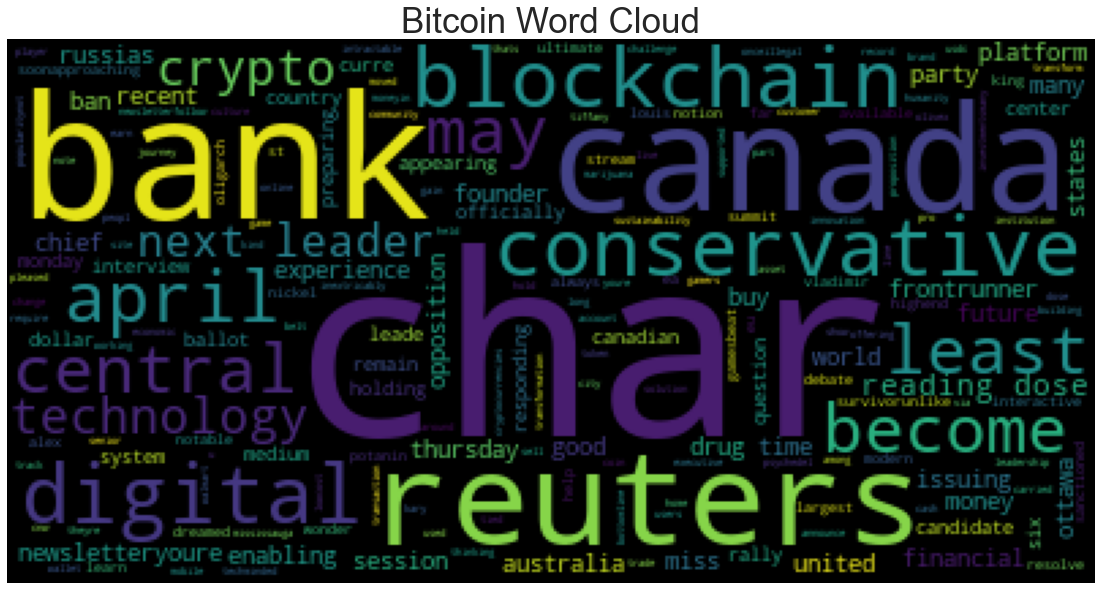

In [44]:
# Generate the Bitcoin word cloud
wc = WordCloud()
bitcoin_string = ' '.join(bitcoin_words)
bitcoin_wordcloud = wc.generate(bitcoin_string)
plt.imshow(bitcoin_wordcloud);
plt.title(label="Bitcoin Word Cloud", size=35)
plt.axis("off");

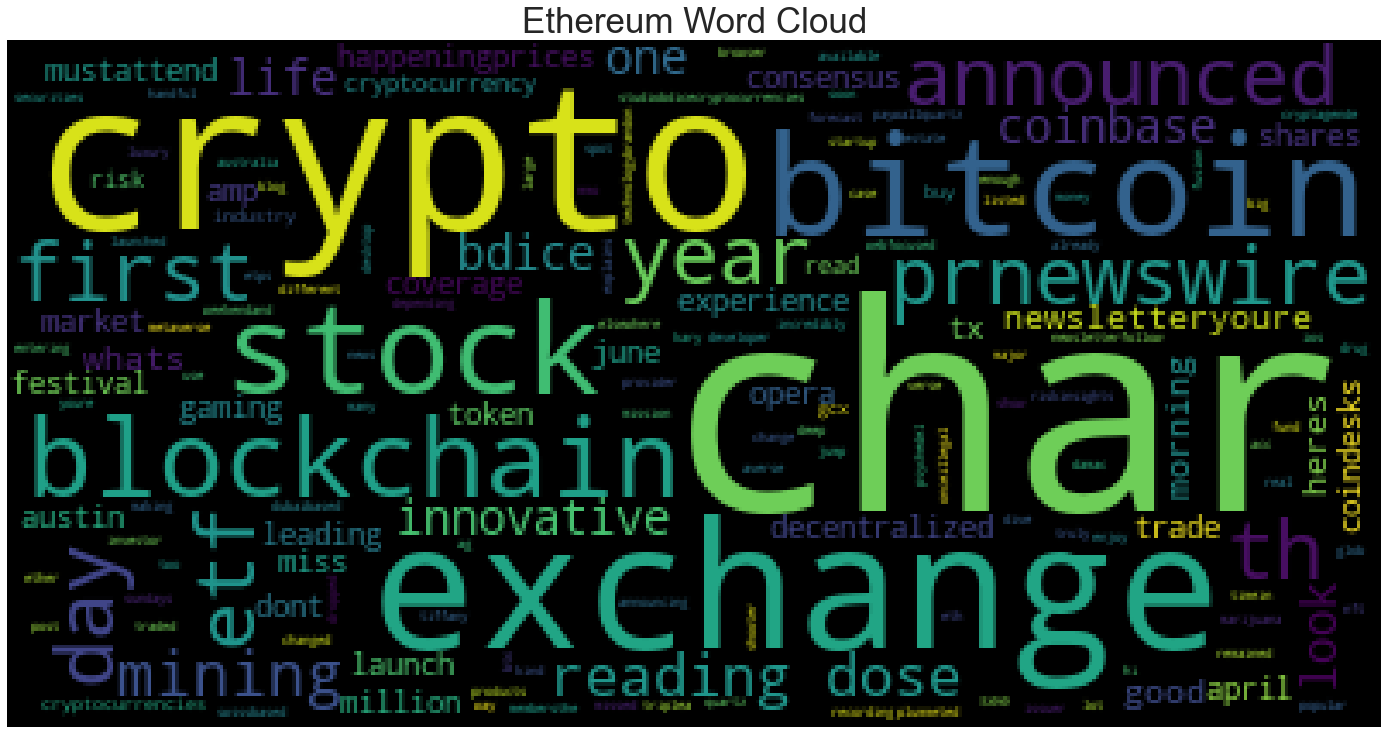

In [45]:
# Generate the Ethereum word cloud
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_words)
ethereum_wordcloud = wc.generate(ethereum_string)
plt.imshow(ethereum_wordcloud);
plt.axis("off");
plt.title(label="Ethereum Word Cloud", size=35)
plt.tight_layout(pad=0);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [47]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ''.join(btc_sentiments_df['text'])
bitcoin_text

'OTTAWA, April 25 (Reuters) - The Canadian dollar will remain at the center of the country\'s financial system, the central bank chief said on Monday, responding to questions about a Conservative leade… [+2728 chars]OTTAWA, April 28 (Reuters) - The front-runner to become the next leader of Canada\'s opposition Conservatives said on Thursday he would ban the Bank of Canada from issuing a central bank digital curre… [+2416 chars]Six candidates are officially on the ballot to become the Conservative Party\'s next leader. In holding rallies, appearing in media interviews, and preparing for the soon-approaching party debates, ea… [+14808 chars]Did you miss a session from GamesBeat Summit 2022? All sessions are available to stream now. Learn more.\xa0 \r\nAlex St. Louis, the founder of Wonder Interactive, has always dreamed of enabling high-end … [+13077 chars]May 4 (Reuters) - So far, at least, "Nickel King" Vladimir Potanin is Russia\'s ultimate survivor.\r\nUnlike many of Russia\'s notabl

In [51]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin Named Entity Recognition (NER)"

In [52]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [57]:

from tabulate import tabulate

# List all Entities
tabulate_bitcoin = []
for ent in bitcoin_ner.ents:
#    print(ent.text, ent.label_)
    tabulate_bitcoin.append([ent.text, ent.label_])
print(tabulate(tabulate_bitcoin, headers=['Bitcoin', 'Named Entity Recognition (NER)']))

Bitcoin                      Named Entity Recognition (NER)
---------------------------  --------------------------------
OTTAWA                       ORG
April 25                     DATE
Reuters                      ORG
Canadian                     NORP
Monday                       DATE
Conservative                 NORP
April 28                     DATE
Reuters                      ORG
Canada                       GPE
Conservatives                NORP
Thursday                     DATE
the Bank of Canada           ORG
the Conservative Party's     ORG
GamesBeat Summit 2022        ORG
Alex St. Louis               PERSON
Wonder Interactive           ORG
4                            CARDINAL
Reuters                      ORG
Nickel King                  WORK_OF_ART
Vladimir Potanin             PERSON
Russia                       GPE
Russia                       GPE
the United States            GPE
Eu                           ORG
11                           CARDINAL
Dose                  

---

### Ethereum NER

In [61]:
# Concatenate all of the Ethereum text together
ethereum_text = ''.join(eth_sentiments_df['text'])
ethereum_text

'Bdice on his recording studio\r\nBdice\r\nCryptocurrencies can truly change lives, and depending on where you look, a lot of lives have already been changed by such innovative technology.\r\nBrandon Bdice … [+2957 chars]There are many different crypto exchanges you can use, but only a handful of these are big enough to be listed on a stock exchange. One such exchange, Coinbase, is incredibly popular and is the large… [+6491 chars]You\'re reading The Dose newsletter.You\'re reading The Dose newsletter.You\'re reading The Dose newsletter.Follow the money as Tiffany Kary shows you how once-illegal drugs like marijuana and psychedel… [+5570 chars]Good morning. Heres whats happening:\r\nPrices: Bitcoin, ether and other major cryptos plummeted as investors remained averse to risk.\r\nInsights: Spot BTC ETFs launch in Australia. But elsewhere, they … [+9949 chars]NEW YORK, April 19, 2022 /PRNewswire/ -- 21Shares AG ("21Shares"), a Swiss-based issuer of crypto Exchange Traded Products (ETPs),

In [62]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_text)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum Named Entity Recognition (NER)"

In [63]:
# Render the visualization
displacy.render(ethereum_ner, style="ent")

In [65]:
# List all Entities
tabulate_ethereum = []
for ent in ethereum_ner.ents:
#    print(ent.text, ent.label_)
    tabulate_ethereum.append([ent.text, ent.label_])
print(tabulate(tabulate_ethereum, headers=['Ethereum', 'Named Entity Recognition (NER)']))

Ethereum                     Named Entity Recognition (NER)
---------------------------  --------------------------------
Bdice                        ORG
Cryptocurrencies
One                          CARDINAL
Coinbase                     PRODUCT
chars]You're reading         PERSON
Dose                         PERSON
Dose                         PERSON
Dose                         PERSON
Tiffany Kary                 PERSON
marijuana                    ORG
morning                      TIME
Heres                        ORG
Australia                    GPE
chars]NEW YORK               GPE
April 19, 2022               DATE
AG                           ORG
21Shares                     WORK_OF_ART
Swiss                        NORP
Exchange Traded Products     ORG
ETF                          ORG
ETF Securities               ORG
two                          CARDINAL
Quartz                       ORG
Forecast                     ORG
Sundays                      DATE
the weekend                 

---